## Data Exercise - Customer Churn

This is an exercise to build a churn prediction model given a customer churn dataset.

### Data Exploration

First, I would like to do a quick check on the dataset that is provided in CSV using pandas and numpy. 

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

##### Load CSV into Pandas Dataframe


In [2]:

df = pd.read_csv('cust_churn.csv')
print('dimensions:', df.shape)
df.head()


dimensions: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Check datatype of each column


In [3]:
# data type for each column
df.dtypes

customerID            int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Count unique values of each column

In [4]:
# unique values for each column
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##### Scan distinct values of `categorical` columns

In [5]:
# Explore distinct values
print('gender:', pd.unique(df['gender']))
print('SeniorCitizen:', pd.unique(df['SeniorCitizen']))
print('Partner:', pd.unique(df['Partner']))
print('Dependents:', pd.unique(df['Dependents']))
print('tenure:', pd.unique(df['tenure']))
print('PhoneService:', pd.unique(df['PhoneService']))
print('MultipleLines:', pd.unique(df['MultipleLines']))
print('InternetService:', pd.unique(df['InternetService']))
print('OnlineSecurity:', pd.unique(df['OnlineSecurity']))
print('OnlineBackup:', pd.unique(df['OnlineBackup']))
print('DeviceProtection:', pd.unique(df['DeviceProtection']))
print('TechSupport:', pd.unique(df['TechSupport']))
print('StreamingTV:', pd.unique(df['StreamingTV']))
print('StreamingMovies:', pd.unique(df['StreamingMovies']))
print('Contract:', pd.unique(df['Contract']))
print('PaperlessBilling:', pd.unique(df['PaperlessBilling']))
print('PaymentMethod:', pd.unique(df['PaymentMethod']))
print('Churn:', pd.unique(df['Churn']))
# pd.unique(df[['MultipleLines', 'OnlineBackup']].values.ravel('K'))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### Update column's datatype accordingly

Pandas provide very handy function to change datatype of a column easily to numeric.  However, when I first tried this, I was getting some `ValueError` around row 488. As it turns out it was because there are some rows where column `TotalCharges` were empty.

To quickly work around it, I added the `errors='coerce'` option.

In [6]:
# cast numeric data types.
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# cast categorical types
df["gender"] = df["gender"].astype('category')
df["SeniorCitizen"] = df["SeniorCitizen"].astype('category')
df["Partner"] = df["Partner"].astype('category')
df["Dependents"] = df["Dependents"].astype('category')
df["PhoneService"] = df["PhoneService"].astype('category')
df["MultipleLines"] = df["MultipleLines"].astype('category')
df["InternetService"] = df["InternetService"].astype('category')
df["OnlineSecurity"] = df["OnlineSecurity"].astype('category')
df["OnlineBackup"] = df["OnlineSecurity"].astype('category')
df["DeviceProtection"] = df["DeviceProtection"].astype('category')
df["TechSupport"] = df["TechSupport"].astype('category')
df["StreamingTV"] = df["StreamingTV"].astype('category')
df["StreamingMovies"] = df["StreamingMovies"].astype('category')
df["Contract"] = df["Contract"].astype('category')
df["PaperlessBilling"] = df["PaperlessBilling"].astype('category')
df["PaymentMethod"] = df["PaymentMethod"].astype('category')
df["Churn"] = df["Churn"].astype('category')
df.dtypes

customerID             int64
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

##### Set `customerID` as Index

I set `customerID` as index of the dataframe, so it won't be treated as a feature. 

In [7]:
# set index
df.set_index('customerID', inplace=True)

Do a quick scan on the dataframe again, especially jump to roughly row 488 to see how missing `TotalCharges` were handled. Not that it is now an `NaN`.

In [8]:
df[480:490]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
481,Male,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,225.75,No
482,Female,0,Yes,No,48,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),45.30,2145.00,Yes
483,Female,1,No,No,20,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,81.45,1671.60,No
484,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.50,8003.80,No
485,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
486,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
487,Female,0,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415.00,No
488,Male,0,No,No,72,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No
489,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


Then I want to check if there is any other columns / row that has missing data. It seems only 11 rows have missing `TotalCharges` data. 

In [9]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Aside from the missing data, it is also noteworthy that this dataset has more categorical data than numeric data.  To be exact, it has only _*3 numeric*_ columns, but *16 categorical* columns.




In [10]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
label_col = ['Churn']
cat_cols = [col for col in df.columns if col not in (numeric_cols + label_col)]
print(len(numeric_cols), 'of numeric:', numeric_cols)
print(len(cat_cols), 'of categorical:', cat_cols)

3 of numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
16 of categorical: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


I also saved the numeric columns and categorical columns as two different datasets, to facilitate further analysis and preprocessing.


In [11]:
cat_df = df[cat_cols]
num_df = df[numeric_cols]

##### Numerical Columns

Here are some simple stats of the numeric columns. 

In [12]:
num_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


**BoxPlots**

[]

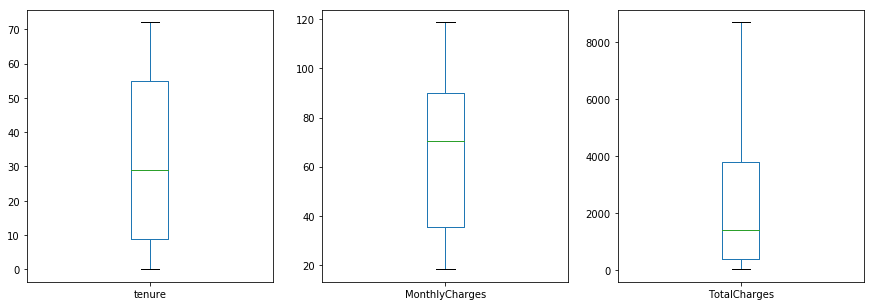

In [13]:
num_df.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()

**Distribution Plots**



/home/chowy/.local/share/virtualenvs/moka-DN4ddI_g/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


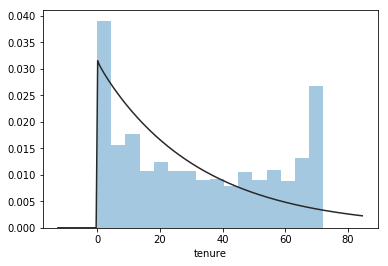

In [14]:
from scipy import stats
sns.distplot(num_df['tenure'], kde=False, fit=stats.gamma)

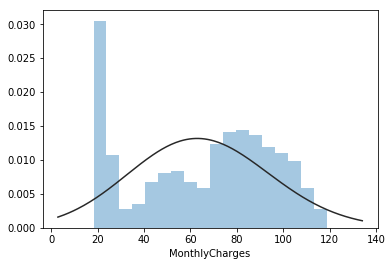

In [15]:
sns.distplot(num_df['MonthlyCharges'], kde=False, fit=stats.gamma)

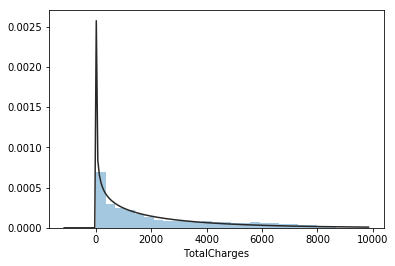

In [16]:
sns.distplot(num_df['TotalCharges'].dropna(), kde=False, fit=stats.gamma)

##### Categorical Columns

For categorical columns, we can't simply feed to the model. We have to first encode it.  There are many encoding methods out there, I have chosen to use OneHotEncoder.  

Scikit-Learn also provides a very convenient API for that.  However let's first verify if it works correctly. To do so, I first encoded the `cat_df`, and print out the results and some of its properties.

In [17]:
from sklearn.preprocessing import OneHotEncoder
sk_ohe = OneHotEncoder(sparse=False)
sk_ohe_cat = sk_ohe.fit_transform(cat_df)

print(sk_ohe_cat.shape)
print(sk_ohe.get_feature_names())
sk_ohe_cat


(7043, 43)
['x0_Female' 'x0_Male' 'x1_0' 'x1_1' 'x2_No' 'x2_Yes' 'x3_No' 'x3_Yes'
 'x4_No' 'x4_Yes' 'x5_No' 'x5_No phone service' 'x5_Yes' 'x6_DSL'
 'x6_Fiber optic' 'x6_No' 'x7_No' 'x7_No internet service' 'x7_Yes'
 'x8_No' 'x8_No internet service' 'x8_Yes' 'x9_No'
 'x9_No internet service' 'x9_Yes' 'x10_No' 'x10_No internet service'
 'x10_Yes' 'x11_No' 'x11_No internet service' 'x11_Yes' 'x12_No'
 'x12_No internet service' 'x12_Yes' 'x13_Month-to-month' 'x13_One year'
 'x13_Two year' 'x14_No' 'x14_Yes' 'x15_Bank transfer (automatic)'
 'x15_Credit card (automatic)' 'x15_Electronic check' 'x15_Mailed check']


array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

To view it more clearly, I transformed the array to pandas dataframe. 

In [18]:
sk_ohe_cat_df = pd.DataFrame(sk_ohe_cat, columns=sk_ohe.get_feature_names())
sk_ohe_cat_df.head()


,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


I did a little more transformation to the dataframe, so it looks more like our original data, except we now have more feature columns. 

In [19]:
sk_ohe_cat_df.index = sk_ohe_cat_df.index + 1
sk_ohe_cat_df.index.name = 'customerID'
sk_ohe_cat_df.head()

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


And now we can compare to the original `cat_df` to see how categorical columns are expanded.

In [20]:
cat_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,No,Mailed check
3,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
4,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


It looks like the scikit-learn could correctly perform one hot encoding. And this will be used as part of the model pipeline.

### Building Model

Now we can start building models using scikit-learn. 

My idea of the model would be a pipeline that does:

1) some pre-processing (a. fill missing data, b. normalize numeric columns, b. one-hot-encode categorical columns) to the data,   
2) feed post processed datae need to perform some preprocessing to the data. 

We import all the necessary modules.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Split the dataset into test and training sets.

In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Next define a `numberic_transformer`, which consists of an imputer (takes care of missing data for `TotalCharges`) and a standard scaler. 

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

Similarly define a `cat_transformer`, which consists of an imputer (in case there are missing data), a one-hot-encoder, and a feature_selction module `SelectKBest`.

In [24]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('kbest', SelectKBest(chi2, k=20))])

Next add a `ColumnTransformer` to apply the transformers to the numeric and categorical columns respectively.

In [25]:
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', cat_transformer, cat_cols)])

#### Classifier Selection

I think it is a good idea to test out a few algorithms before deciding which to finetune. I have selected a few common ones to start with. 

In [26]:
# Try out a few common classifiers 
classifiers = []
classifiers.append(('LR', LogisticRegression(solver='lbfgs')))
classifiers.append(('RF', RandomForestClassifier(n_estimators=100)))
classifiers.append(('DT', DecisionTreeClassifier()))
classifiers.append(('KNN', KNeighborsClassifier()))
clf_scores = {}

Verify the classifiers defined.

In [27]:
classifiers


[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
            tol=0.0001, verbose=0, warm_start=False)),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
       

For each of the classifiers, we build a model, fit it against the training set, and evaluate its output accuracy.

In [42]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
2859,Female,0,Yes,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.55,252.75
1672,Male,0,Yes,Yes,66,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,7031.30
2876,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
1741,Male,0,Yes,Yes,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.40,745.30
5212,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.90,764.95
1308,Female,0,No,No,36,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Mailed check,75.55,2680.15
1421,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,5985.75
4418,Male,0,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45
1804,Female,0,No,No,36,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,53.10,1901.25


In [43]:
y_train

customerID
2859     No
1672     No
2876    Yes
1741     No
5212    Yes
1308     No
1421     No
4418    Yes
1804     No
5707    Yes
4289    Yes
5563     No
958      No
6192     No
2429    Yes
58       No
5891     No
366     Yes
3710     No
4433     No
645      No
1460     No
4565    Yes
2510     No
5210     No
1863     No
272      No
897      No
2917     No
4699    Yes
       ... 
5964     No
3005    Yes
3572     No
1023     No
1149    Yes
624      No
1408     No
5015     No
6530    Yes
2758     No
4082    Yes
93       No
927     Yes
1392     No
224     Yes
1036     No
6522     No
2128    Yes
3399     No
2847     No
4472    Yes
6668    Yes
760      No
1053     No
6910     No
5316    Yes
36       No
306      No
5433    Yes
6890     No
Name: Churn, Length: 5634, dtype: category
Categories (2, object): [No, Yes]

In [28]:
for name, classifier in classifiers:
    cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=42)
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy', error_score='raise')
    clf_scores[name] = scores
    msg = "%s: avg: %f (std: %f, max: %f, min: %f)" % (name, scores.mean(), scores.std(), scores.max(), scores.min())
    print(msg)

LR: avg: 0.797516 (std: 0.008062, max: 0.803666, min: 0.781786)
RF: avg: 0.779184 (std: 0.004695, max: 0.785925, min: 0.772915)
DT: avg: 0.734950 (std: 0.005628, max: 0.743347, min: 0.728563)
KNN: avg: 0.771969 (std: 0.011658, max: 0.784151, min: 0.749852)


From the above print out, it seems LinearRegression gives the best results. And the graph shows the performance of each run. 

[]

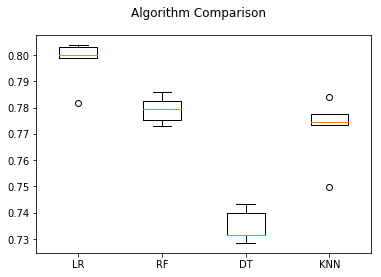

In [29]:
# Compare Algorithms
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(clf_scores.values())
ax.set_xticklabels(clf_scores.keys())
plt.plot()

#### Model Tuning 

Now that we decided on the classifier, we could move on to fine-tuning the parameters of this pipeline. 

We start with declaring cross-validator and the pipeline again. 

In [30]:
cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=42)
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='lbfgs'))])

In [31]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__kbest__k': [5, 10, 15, 18, 20, 25],
    'classifier__C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'preprocessor__num__imputer__strategy': ['mean', 'median'], 'preprocessor__cat__kbest__k': [5, 10, 15, 18, 20, 25], 'classifier__C': [0.1, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
best_params = grid_search.best_params_
best_params

{'classifier__C': 100,
 'preprocessor__cat__kbest__k': 18,
 'preprocessor__num__imputer__strategy': 'median'}

In [33]:
best_estimator = grid_search.best_estimator_
best_estimator

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [34]:
best_score = grid_search.best_score_
best_score

0.7990538143110586

In [35]:
# results = grid_search.cv_results_
print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.815


#### Predictions

With the best combinations of parameters found, and the best estimator built, we can now perform prediction. 

In [36]:
y_pred = grid_search.predict(X_test)
y_pred_probs = grid_search.predict_proba(X_test)
display(y_pred)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

#### Evaluations

To see how well this model performs on predicting, we look at the confusion matrix. 



In [37]:
print(accuracy_score(y_test, y_pred))


0.815471965933286


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1039
         Yes       0.68      0.57      0.62       370

   micro avg       0.82      0.82      0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
np.set_printoptions(precision=2)

[[938 101]
 [159 211]]


Here is a function to plot confusion_matrix.

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Plot non-normalized and normalized confusion matrix.

Confusion matrix, without normalization
[[938 101]
 [159 211]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.43 0.57]]


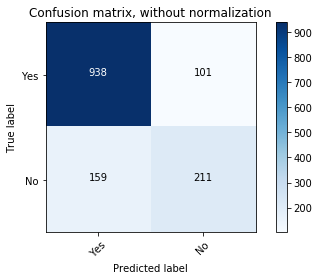

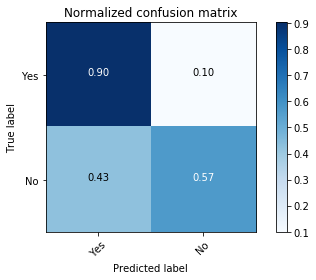

In [41]:

class_names = ['Yes', 'No']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()